# Unconditional image generation

Unconditional image generation is a relatively straightforward task. The model only generates images - without any additional context like text or an image - resembling the training data it was trained on.

The [DiffusionPipeline](https://huggingface.co/docs/diffusers/main/en/api/pipelines/overview#diffusers.DiffusionPipeline) is the easiest way to use a pre-trained diffusion system for inference.

Start by creating an instance of [DiffusionPipeline](https://huggingface.co/docs/diffusers/main/en/api/pipelines/overview#diffusers.DiffusionPipeline) and specify which pipeline checkpoint you would like to download.
You can use any of the 🧨 Diffusers [checkpoints](https://huggingface.co/models?library=diffusers&sort=downloads) from the Hub (the checkpoint you'll use generates images of butterflies).

<Tip>

💡 Want to train your own unconditional image generation model? Take a look at the training [guide](https://huggingface.co/docs/diffusers/main/en/using-diffusers/training/unconditional_training) to learn how to generate your own images.

</Tip>

In this guide, you'll use [DiffusionPipeline](https://huggingface.co/docs/diffusers/main/en/api/pipelines/overview#diffusers.DiffusionPipeline) for unconditional image generation with [DDPM](https://arxiv.org/abs/2006.11239):

In [1]:
!pip install diffusers transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 9.7 MB/s eta 0:00:00


In [2]:
from diffusers import DiffusionPipeline

generator = DiffusionPipeline.from_pretrained("anton-l/ddpm-butterflies-128")

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

model_index.json:   0%|          | 0.00/181 [00:00<?, ?B/s]

Fetching 4 files:   0%|          | 0/4 [00:00<?, ?it/s]

unet/config.json:   0%|          | 0.00/852 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/289 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/455M [00:00<?, ?B/s]

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


Loading pipeline components...:   0%|          | 0/2 [00:00<?, ?it/s]

The [DiffusionPipeline](https://huggingface.co/docs/diffusers/main/en/api/pipelines/overview#diffusers.DiffusionPipeline) downloads and caches all modeling, tokenization, and scheduling components.
Because the model consists of roughly 1.4 billion parameters, we strongly recommend running it on a GPU.
You can move the generator object to a GPU, just like you would in PyTorch:

In [3]:
generator.to("cuda")

DDPMPipeline {
  "_class_name": "DDPMPipeline",
  "_diffusers_version": "0.24.0",
  "_name_or_path": "anton-l/ddpm-butterflies-128",
  "scheduler": [
    "diffusers",
    "DDPMScheduler"
  ],
  "unet": [
    "diffusers",
    "UNet2DModel"
  ]
}

Now you can use the `generator` to generate an image:

In [4]:
image = generator().images[0]

  0%|          | 0/1000 [00:00<?, ?it/s]

The output is by default wrapped into a [`PIL.Image`](https://pillow.readthedocs.io/en/stable/reference/Image.html?highlight=image#the-image-class) object.

You can save the image by calling:

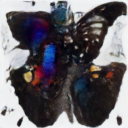

In [5]:
image.save("generated_image.png")
image